In [2]:
using CoolProp

In [3]:
PropsSI("D", "T", 300, "P", 101325, "n-Butane")

2.4325863624814326

In [4]:
using Interpolations

In [5]:
using Plots
gr()

Plots.GRBackend()

In [6]:
fluid_type = "Butane"

"Butane"

In [7]:
d = 1e-3

0.001

In [8]:
Tᵥ = 295.0

295.0

In [9]:
ρₗ  = CoolProp.PropsSI("D","T",Tᵥ,"Q",0.0,fluid_type)

576.4727745885054

In [10]:
ρᵥ  = CoolProp.PropsSI("D","T",Tᵥ,"Q",1.0,fluid_type)

5.619013384142316

In [11]:
hₗ = CoolProp.PropsSI("H","T",Tᵥ,"Q",0.0,fluid_type)

251784.93076619998

In [12]:
hᵥ = CoolProp.PropsSI("H","T",Tᵥ,"Q",1.0,fluid_type)

616444.5004460975

In [13]:
Cpₗ = CoolProp.PropsSI("CPMASS","T",Tᵥ,"Q",0.0,fluid_type)

2423.00871631122

In [14]:
Cpᵥ = CoolProp.PropsSI("CPMASS","T",Tᵥ,"Q",1.0,fluid_type)

1777.4588672805596

In [15]:
μₗ = CoolProp.PropsSI("V","T",Tᵥ,"Q",0.0,fluid_type)

0.00016322746825352366

In [16]:
μᵥ = CoolProp.PropsSI("V","T",Tᵥ,"Q",1.0,fluid_type)

7.308457480329653e-6

In [17]:
kₗ = CoolProp.PropsSI("CONDUCTIVITY","T",Tᵥ,"Q",0.0,fluid_type)

0.10602468282359685

In [18]:
kᵥ = CoolProp.PropsSI("CONDUCTIVITY","T",Tᵥ,"Q",1.0,fluid_type)

0.016272671857647733

In [19]:
Prₗ = CoolProp.PropsSI("PRANDTL","T",Tᵥ,"Q",0.0,fluid_type)

3.7302783445033603

In [20]:
Prᵥ = CoolProp.PropsSI("PRANDTL","T",Tᵥ,"Q",1.0,fluid_type)

0.7983005291444925

In [21]:
σ = CoolProp.PropsSI("I","T",Tᵥ,"Q",0.0,fluid_type)

0.012279469759138965

In [22]:
kₗ/(Cpₗ*μₗ)*6.56e-3^2

1.153629730162385e-5

In [23]:
Dₗ = CoolProp.PropsSI("D","T",Tᵥ,"Q",0.0,fluid_type)

576.4727745885054

In [24]:
Dᵥ = CoolProp.PropsSI("D","T",Tᵥ,"Q",1.0,fluid_type)

5.619013384142316

In [25]:
P = CoolProp.PropsSI("P","T",Tᵥ,"Q",0.0,fluid_type)

220337.19644977106

In [26]:
R = CoolProp.PropsSI("GAS_CONSTANT","T",Tᵥ,"Q",1.0,fluid_type)

8.314472

In [27]:
M = CoolProp.PropsSI("M","T",Tᵥ,"Q",1.0,fluid_type)

0.0581222

In [28]:
Rkg = R/M

143.0515706563069

In [29]:
Rin = d/2
δ = 1e-5

1.0e-5

In [30]:
Rn = 1e-7:1e-7:1e-3

1.0e-7:1.0e-7:0.001

In [31]:
y = Rkg .* Tᵥ ./ (hᵥ-hₗ) .* log.(1 .+ 2 .* σ ./ P .* (1 ./ Rn .- 1/2(Rin-δ)))

10000-element Vector{Float64}:
  0.08665661001782884
  0.05125259148910966
  0.03655151069516906
  0.028435619700334265
  0.02327802774061473
  0.019707336845960717
  0.01708765933402458
  0.015083235116959548
  0.013499876251890324
  0.012217403996065372
  0.011157433233780866
  0.010266646989204913
  0.00950751192109428
  ⋮
 -2.4903650019462654e-7
 -2.503290945569873e-7
 -2.516214301863184e-7
 -2.5291350714685177e-7
 -2.5420532552851513e-7
 -2.5549688540838837e-7
 -2.567881868635513e-7
 -2.580792299582356e-7
 -2.5937001479521737e-7
 -2.6066054143872835e-7
 -2.6195080995300027e-7
 -2.6324082042796104e-7

In [32]:
ΔTᵥ = Tᵥ .* (1 ./ (1 .- y) .- 1)

10000-element Vector{Float64}:
 27.989144319266945
 15.936290685650711
 11.191771822544503
  8.634021565314365
  7.030678512940929
  5.930539509347388
  5.128493452551231
  4.51769582786162
  4.036961981491338
  3.6487119670055126
  3.3285812267662274
  3.0600775982765316
  2.8316378473123605
  ⋮
 -7.346574921796023e-5
 -7.384706442459255e-5
 -7.422830322179053e-5
 -7.460946577331207e-5
 -7.499055194815085e-5
 -7.537156194281636e-5
 -7.575249569180542e-5
 -7.613335319511805e-5
 -7.651413451825739e-5
 -7.689483966122346e-5
 -7.72754686895194e-5
 -7.765602160314522e-5

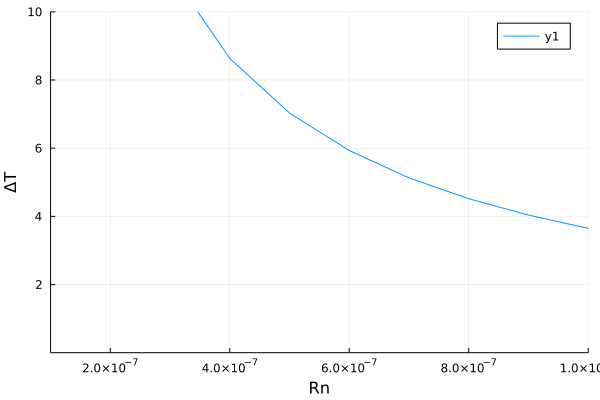

In [33]:
plot(Rn,ΔTᵥ,ylabel="ΔT",xlabel="Rn",xlim=(1e-7,1e-6),ylim=(0.0005,10))

### Rn = 12 μm -> ΔT = 0.3 [K]
### Rn = 4 μm -> ΔT = 1    [K]
### Rn = 0.7 μm -> ΔT = 5 [K]

In [35]:
hᵥ - hₗ 

364659.5696798975